In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [41]:
data_dir='/Users/pvb/Dropbox/Oceanografia/Data/Argo/Gridded/RG_ArgoClim/NC/'

fileTemp2019 = data_dir+'RG_ArgoClim_Temperature_2019.nc'
fileSalt2019 = data_dir+'RG_ArgoClim_Salinity_2019.nc'

XrTemp2019 = xr.open_dataset(fileTemp2019, decode_times=False)
XrSalt2019 = xr.open_dataset(fileSalt2019, decode_times=False)


In [42]:
T_mean = XrTemp2019.ARGO_TEMPERATURE_MEAN
S_mean = XrSalt2019.ARGO_SALINITY_MEAN

T0_anom = XrTemp2019.ARGO_TEMPERATURE_ANOMALY
S0_anom = XrSalt2019.ARGO_SALINITY_ANOMALY

In [8]:
XrTemp2019.rename({'LATITUDE':'lat'})

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, lat: 145, PRESSURE: 58, TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * lat                       (lat) float32 -64.5 -63.5 -62.5 ... 77.5 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, lat, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, lat, LONGITUDE) float32 1.082 ...
    BATHYMETRY_MASK           (PRESSURE, lat, LONGITUDE) float32 ...
    MAPPING_MASK              (PRESSURE, lat, LONGITUDE) float32 ...

In [10]:
Month0 = XrTemp2019.TIME.values

In [30]:
XrTemp2019.assign_coords(time=("time", Month0))

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180, time: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 177.5 178.5 179.5
  * time                      (time) float32 0.5 1.5 2.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 1...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 ...

In [45]:
#XrTemp2019.drop('time')
XrTemp2019.drop_indexes('TIME')
#XrTemp2019.assign_coords(time=("time", Month0))


<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
    TIME                      (TIME) float32 0.5 1.5 2.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 ...

In [11]:
files = []
for iy in range(2019,2023):
    for im in range(1,13):
        files.append(data_dir+"RG_ArgoClim_%04d%02d_2019.nc"%(iy,im))


In [12]:
files.append(data_dir+"RG_ArgoClim_202301_2019.nc")
files.append(data_dir+"RG_ArgoClim_202302_2019.nc")

In [13]:
data = xr.open_mfdataset(files, decode_times=False)

<xarray.DataArray 'ARGO_TEMPERATURE_ANOMALY' (TIME: 180, PRESSURE: 58,
                                              LATITUDE: 145, LONGITUDE: 360)>
array([[[[ 1.082, ...,  1.111],
         ...,
         [   nan, ...,    nan]],

        ...,

        [[-0.013, ..., -0.011],
         ...,
         [   nan, ...,    nan]]],


       ...,


       [[[-0.432, ..., -0.412],
         ...,
         [   nan, ...,    nan]],

        ...,

        [[ 0.034, ...,  0.032],
         ...,
         [   nan, ...,    nan]]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) float32 0.5 1.5 2.5 3.5 4.5 ... 176.5 177.5 178.5 179.5
Attributes:
    units:      degree celcius (ITS-90)
    long_name:  ARGO TEMPERATURE ANOMALY defined by Jan 2004 - Dec 2018 (15.0...

In [22]:
T1_anom = data.ARGO_TEMPERATURE_ANOMALY
S1_anom = data.ARGO_SALINITY_ANOMALY

In [26]:
T_anom=xr.concat([T0_anom,T1_anom],dim='TIME')

In [27]:
T_anom

<xarray.DataArray 'ARGO_TEMPERATURE_ANOMALY' (TIME: 230, PRESSURE: 58,
                                              LATITUDE: 145, LONGITUDE: 360)>
dask.array<concatenate, shape=(230, 58, 145, 360), dtype=float32, chunksize=(83, 58, 83, 83), chunktype=numpy.ndarray>
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) float32 0.5 1.5 2.5 3.5 4.5 ... 226.5 227.5 228.5 229.5
Attributes:
    units:      degree celcius (ITS-90)
    long_name:  ARGO TEMPERATURE ANOMALY defined by Jan 2004 - Dec 2018 (15.0...

In [61]:
Month1 = data.TIME.values

In [62]:
Months = np.concatenate([Month0,Month1])

In [73]:
T_anom = np.concatenate([T0_anom,T1_anom],axis=0) 
S_anom = np.concatenate([S0_anom,S1_anom],axis=0) 

In [71]:
T0_anom.shape

(180, 58, 145, 360)

In [76]:
T=data2019.ARGO_TEMPERATURE_ANOMALY+data2019.ARGO_TEMPERATURE_MEAN

In [77]:
T.sel(LATITUDE=29,LONGITUDE=340,method='nearest')

<xarray.DataArray (TIME: 180, PRESSURE: 58)>
array([[20.127    , 20.126    , 20.125    , ...,  4.9639997,  4.63     ,
         4.447    ],
       [19.568    , 19.563    , 19.550999 , ...,  4.97     ,  4.656    ,
         4.442    ],
       [18.984001 , 18.98     , 18.981998 , ...,  4.9969997,  4.671    ,
         4.445    ],
       ...,
       [24.014    , 24.025    , 24.047998 , ...,  4.898    ,  4.62     ,
         4.395    ],
       [22.223    , 22.222    , 22.203    , ...,  4.901    ,  4.61     ,
         4.404    ],
       [21.154001 , 21.151001 , 21.151999 , ...,  4.9309998,  4.631    ,
         4.435    ]], dtype=float32)
Coordinates:
    LONGITUDE  float32 340.5
    LATITUDE   float32 29.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) float32 0.5 1.5 2.5 3.5 4.5 ... 176.5 177.5 178.5 179.5

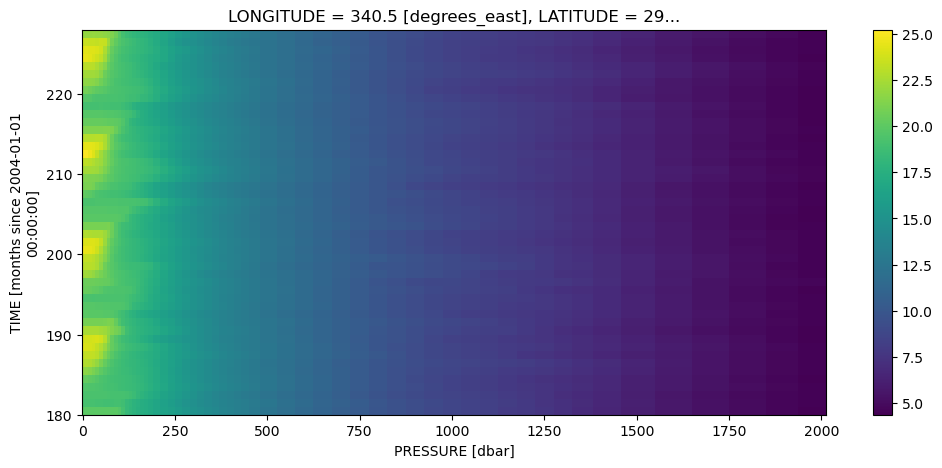

In [78]:
T2=data.ARGO_TEMPERATURE_ANOMALY+data2019.ARGO_TEMPERATURE_MEAN
T2.sel(LATITUDE=29,LONGITUDE=340,method='nearest').plot()

In [81]:
data.ARGO_TEMPERATURE_ANOMALY

Object `data.ARGO_TEMPERATURE_ANOMALY.vstack` not found.


In [86]:
xr.

<module 'xarray' from '/Users/pvb/miniconda3/envs/Ocean/lib/python3.11/site-packages/xarray/__init__.py'>

In [94]:
data2=data

In [98]:
xr.merge?

Signature:
xr.merge(
    objects: 'Iterable[DataArray | CoercibleMapping]',
    compat: 'CompatOptions' = 'no_conflicts',
    join: 'JoinOptions' = 'outer',
    fill_value: 'object' = <NA>,
    combine_attrs: 'CombineAttrsOptions' = 'override',
) -> 'Dataset'
Docstring:
Merge any number of xarray objects into a single Dataset as variables.

Parameters
----------
objects : iterable of Dataset or iterable of DataArray or iterable of dict-like
    Merge together all variables from these objects. If any of them are
    DataArray objects, they must have a name.
compat : {"identical", "equals", "broadcast_equals", "no_conflicts",               "override", "minimal"}, default: "no_conflicts"
    String indicating how to compare variables of the same name for
    potential conflicts:

    - "identical": all values, dimensions and attributes must be the
      same.
    - "equals": all values and dimensions must be the same.
    - "broadcast_equals": all values must be equal when variables are
 